In [1]:
import pandas as pd
from tabular_data import hello
h = hello()
df = pd.read_csv("/Users/dq/Documents/aicore_project/Airbnb_Project/AirBnbData.csv")
df = h.clean_tabular_data(df)
df = df.iloc[:,:]
x, y = h.load_airbnb(df,"Price_Night")

In [2]:
y

0      105.0
1       92.0
2       52.0
3      132.0
5      143.0
       ...  
982    240.0
983     78.0
984    113.0
985     80.0
987    104.0
Name: Price_Night, Length: 830, dtype: float64

In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=0)
model = SGDRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_pred

array([-9.35875390e+08, -4.84063737e+08, -1.52851855e+08,  1.19765875e+07,
       -5.43114353e+08, -9.00961507e+08,  5.71052592e+08,  4.23326901e+08,
       -1.93511909e+08,  1.61666174e+08, -1.38806604e+07,  2.59403145e+07,
       -1.11824730e+08,  3.14832434e+09, -7.32334337e+08,  2.72089890e+08,
        5.02781506e+08, -3.61881143e+07,  6.38526613e+08, -1.67126722e+09,
        1.15930980e+09,  7.38769944e+08,  8.46291264e+07,  1.23612390e+09,
        3.96958084e+07, -8.91014001e+08, -1.81551591e+09, -2.80307941e+08,
        5.60685682e+08,  6.31170369e+08, -2.21434627e+09,  7.86584184e+08,
       -3.63462755e+09,  4.06010850e+07,  1.77681864e+09,  2.75580828e+08,
        7.83460289e+08,  2.99475768e+08,  1.23493380e+08, -2.97935817e+08,
        3.85666315e+08, -1.05038313e+08,  1.24056721e+07,  1.97896359e+09,
       -2.55863913e+08, -4.50315223e+08,  2.16088656e+08,  9.88768609e+08,
       -8.58246841e+08,  3.20927833e+08, -9.81537478e+08,  6.36328313e+08,
        1.10066214e+08,  

In [4]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
761,81.0,-9.358754e+08
45,222.0,-4.840637e+08
550,225.0,-1.528519e+08
11,106.0,1.197659e+07
446,170.0,-5.431144e+08
...,...,...
870,132.0,-4.773806e+08
737,91.0,2.495555e+09
788,211.0,-5.997867e+08
418,145.0,4.168618e+08


In [5]:
X_test

,guests,beds,bathrooms,Cleanliness_rate,Accuracy_rate,Communication_rate,Location_rate,Check-in_rate,Value_rate,amenities_count,bedrooms
761,2.0,1.0,1.0,4.8,5.0,5.0,5.0,5.0,4.8,24.0,1.0
45,6.0,3.0,1.0,4.9,5.0,5.0,5.0,5.0,4.8,28.0,2.0
550,2.0,1.0,1.0,4.6,4.6,4.6,5.0,4.6,4.6,38.0,1.0
11,5.0,4.0,1.0,4.3,4.5,4.4,4.8,4.5,4.1,10.0,1.0
446,4.0,3.0,1.0,4.9,4.9,5.0,4.9,5.0,4.9,56.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
870,6.0,5.0,1.5,5.0,5.0,5.0,5.0,5.0,5.0,61.0,3.0
737,6.0,3.0,2.0,5.0,5.0,5.0,4.3,4.3,5.0,14.0,2.0
788,4.0,2.0,1.0,5.0,5.0,5.0,5.0,5.0,4.9,36.0,2.0
418,2.0,1.0,1.5,5.0,5.0,5.0,4.9,5.0,4.9,25.0,1.0


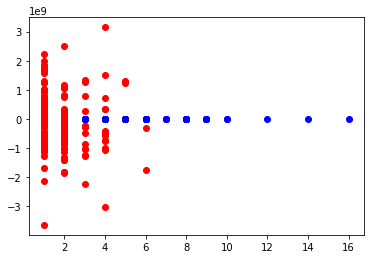

In [6]:
import numpy as np
plt.scatter(X_test['guests'], y_test, color='blue')
plt.scatter(X_test['bedrooms'], y_pred, color='red')
plt.show()

In [7]:
#measures the average of error squares i.e. the average squared difference between the estimated values and true value.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

877163334.0900117

In [8]:
mean_squared_error(y_train, y_train_pred, squared=False)

775911694.5590167

In [9]:
#r2 score: regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-25076544743108.805

In [10]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

-50816181459985.09

In [11]:
# GridSearchCV: process of performing hyperparameter tuning in order to determine the optimal values for a given model.
def custom_tune_regression_model_hyperparameters(model, set, hyperparameters):
    best_mse = float('inf')
    best_reg = None
    for loss in hyperparameters['loss']:
        # print('training for alpha = {}'.format(alpha))
        for learning_rate in hyperparameters['learning_rate']:
            # print('training for eta0 = {}'.format(eta0))
            m = model(loss=loss, learning_rate=learning_rate)
            m.fit(X_train, y_train)
            y_pred = m.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_params = {'loss': loss, 'learning_rate': learning_rate}
                best_reg = m
    return best_reg, best_params, best_mse

set = [X_train, X_test, y_train, y_test]
model = SGDRegressor
# hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#                    'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

hyperparameters={"loss":['squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'],
                 "learning_rate":['constant', 'optimal', 'invscaling', 'adaptive']}
best_reg, best_params, best_mse = custom_tune_regression_model_hyperparameters(model, set,hyperparameters)
print(best_params)
print(best_mse)


{'loss': 'huber', 'learning_rate': 'optimal'}
22941.936657715338


In [12]:
import joblib
import json
def save_model_to_file(filename):
    joblib.dump(model, filename)

def save_hyperparameters_to_file(filename):
    with open(filename, 'w') as f:
        json.dump(hyperparameters, f)

def save_metrics_to_file(filename):
    with open(filename, 'w') as f:
        json.dump(metrics, f)


In [13]:
from sklearn.model_selection import GridSearchCV

def tune_regression_model_hyperparameters(model, hyperparameters):
    grid_search = GridSearchCV(model, hyperparameters, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_

In [14]:
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
model = SGDRegressor()
metrics = tune_regression_model_hyperparameters(model, hyperparameters)

save_model_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/regression/model.joblib')
save_hyperparameters_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/regression/hyperparameters.json')
save_metrics_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/regression/metrics.json')

In [15]:
metrics

({'alpha': 1, 'eta0': 0.001}, -9198.848572765435)

In [16]:
from sklearn import tree

hyperparameters = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                   'max_depth': [2,4,6,8,10,12]}
model = tree.DecisionTreeRegressor()
metrics = tune_regression_model_hyperparameters(model, hyperparameters)

save_model_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/decisiontree/model.joblib')
save_hyperparameters_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/decisiontree/hyperparamenters.json')
save_metrics_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/decisiontree/metrics.json')

In [17]:
metrics

({'criterion': 'squared_error', 'max_depth': 2}, -9783.082294632852)

In [18]:
from sklearn.ensemble import RandomForestRegressor

hyperparameters = {'max_depth': [60, 70, 80, 90, 100, None],
                   'n_estimators': [200, 400, 600, 800, 1000]}
model = RandomForestRegressor()
metrics = tune_regression_model_hyperparameters(model, hyperparameters)

save_model_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/randomforest/model.joblib')
save_hyperparameters_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/randomforest/hyperparameters.json')
save_metrics_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/randomforest/metrics.json')

In [19]:
metrics

({'max_depth': 100, 'n_estimators': 400}, -8846.470856985397)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

hyperparameters = {"n_estimators": [200, 400, 600, 800, 1000],
                    "loss":['squared_error', 'huber', 'quantile','absolute_error']}
model = GradientBoostingRegressor()
metrics = tune_regression_model_hyperparameters(model, hyperparameters)

save_model_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/gradientboostingregressor/model.joblib')
save_hyperparameters_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/gradientboostingregressor/hyperparamenters.json')
save_metrics_to_file('/Users/dq/Documents/aicore_project/Airbnb_Project/models/gradientboostingregressor/metrics.json')

In [21]:
metrics

({'loss': 'huber', 'n_estimators': 200}, -8994.84460737376)

In [22]:
def evaluate_all_models():
    path = '/Users/dq/Documents/aicore_project/Airbnb_Project/models/'
    hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    SGDRregressor = SGDRegressor()
    sgdr_metrics = tune_regression_model_hyperparameters(SGDRregressor, hyperparameters)

    save_model_to_file(path + 'regression/model.joblib')
    save_hyperparameters_to_file(path +'regression/hyperparameters.json')
    save_metrics_to_file(path + 'regression/metrics.json')

    hyperparameters = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                   'max_depth': [2,4,6,8,10,12]}
    decision_tree = tree.DecisionTreeRegressor()
    decisiontree_metrics = tune_regression_model_hyperparameters(decision_tree, hyperparameters)

    save_model_to_file(path + 'decisiontree/model.joblib')
    save_hyperparameters_to_file(path + 'decisiontree/hyperparamenters.json')
    save_metrics_to_file(path + 'decisiontree/metrics.json')

    hyperparameters = {'max_depth': [60, 70, 80, 90, 100, None],
                   'n_estimators': [200, 400, 600, 800, 1000]}
    random_forest = RandomForestRegressor()
    random_forest_metrics = tune_regression_model_hyperparameters(random_forest, hyperparameters)

    save_model_to_file(path + 'randomforest/model.joblib')
    save_hyperparameters_to_file(path + 'randomforest/hyperparameters.json')
    save_metrics_to_file(path + 'randomforest/metrics.json')

    hyperparameters = {"n_estimators": [200, 400, 600, 800, 1000],
                    "loss":['squared_error', 'huber', 'quantile','absolute_error']}
    gradient_booster = GradientBoostingRegressor()
    gradient_booster_metrics = tune_regression_model_hyperparameters(gradient_booster, hyperparameters)

    save_model_to_file(path + 'gradientboostingregressor/model.joblib')
    save_hyperparameters_to_file(path + 'gradientboostingregressor/hyperparamenters.json')
    save_metrics_to_file(path + 'gradientboostingregressor/metrics.json')

evaluate_all_models()

In [23]:
def find_best_model():
	hyperparameters = [
	{
		'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
		'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
	},
	{
		'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
		'max_depth': [2,4,6,8,10,12]
	},
	{
		'max_depth': [60, 70, 80, 90, 100],
		'n_estimators': [200, 400, 600, 800, 1000]
	},
	{
		"n_estimators": [200, 400, 600, 800, 1000],
		"loss":['squared_error', 'huber', 'quantile','absolute_error']
	}]
	new_list = []
	models = [
        SGDRegressor(),
        tree.DecisionTreeRegressor(),
		RandomForestRegressor(),
		GradientBoostingRegressor()]
	
	list_zip = list(zip(models, hyperparameters))
	
	for i in range(len(list_zip)):
		model, hp = list_zip[i]
		metrics = tune_regression_model_hyperparameters(model, hp)
		print(model, metrics)
find_best_model()

SGDRegressor() ({'alpha': 0.001, 'eta0': 0.001}, -9149.22024024143)
DecisionTreeRegressor() ({'criterion': 'squared_error', 'max_depth': 2}, -9783.082294632852)
RandomForestRegressor() ({'max_depth': 60, 'n_estimators': 1000}, -8878.579065954904)
GradientBoostingRegressor() ({'loss': 'absolute_error', 'n_estimators': 400}, -9000.320703240492)


In [24]:
hyperparameters = [
{
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
},
{
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [2,4,6,8,10,12]
},
{
    'max_depth': [60, 70, 80, 90, 100, None],
    'n_estimators': [200, 400, 600, 800, 1000]
},
{
    "n_estimators": [200, 400, 600, 800, 1000],
    "loss":['squared_error', 'huber', 'quantile','absolute_error']
}]
models = [
    SGDRegressor(),
    tree.DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()]

list_zip = list(zip(models, hyperparameters))

In [25]:
for i in range(len(list_zip)):
    model, hp = list_zip[i]
    print(model)
    

SGDRegressor()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()


In [26]:
model

GradientBoostingRegressor()

In [27]:
type(list_zip[0])

tuple

In [28]:
a, b = list_zip[0]
print(a, b)

SGDRegressor() {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'eta0': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
